<a href="https://colab.research.google.com/github/maxi9113/colab_notebook/blob/main/IC_Ejercicio_jerarquicio_taller_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Circles

In [ ]:
%pip install scipy

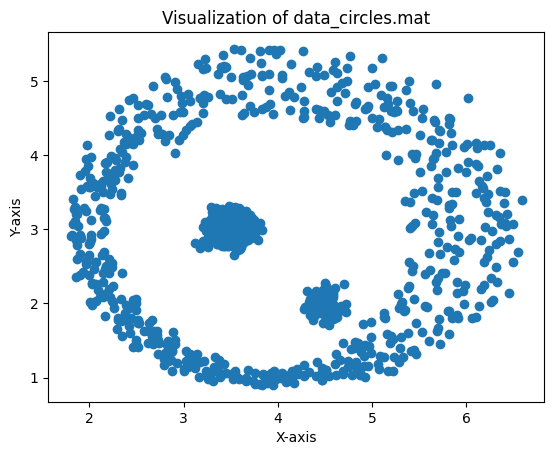

In [ ]:
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Load the .mat file
mat_data = loadmat('/content/drive/MyDrive/Colab Notebooks/Files/data_circles.mat')

# Extract the data (assuming the data is stored in a variable named 'X' and 'Y' in the .mat file)
X = mat_data['X']
Y = mat_data['Y']

# Create a scatter plot
plt.scatter(X[:, 0], Y[:, 0])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Visualization of data_circles.mat')
plt.show()

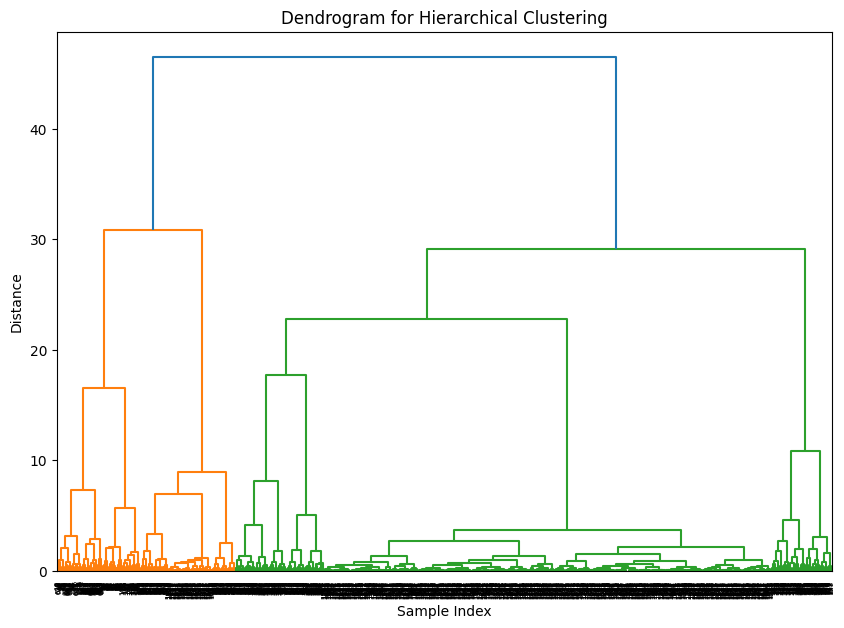

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

# Perform hierarchical clustering
# We use 'ward' linkage which minimizes the variance of the clusters being merged.
# Since X and Y are separate arrays, we need to combine them for clustering.
# Assuming X and Y correspond to the two dimensions of the data points.
#data = mat_data['X'] # Assuming X contains the data points
# If your data has more than one dimension stored in separate arrays, you would combine them like this:
data = np.hstack((mat_data['X'], mat_data['Y']))

linked_circles = linkage(data, 'ward')

# Generate the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked_circles,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

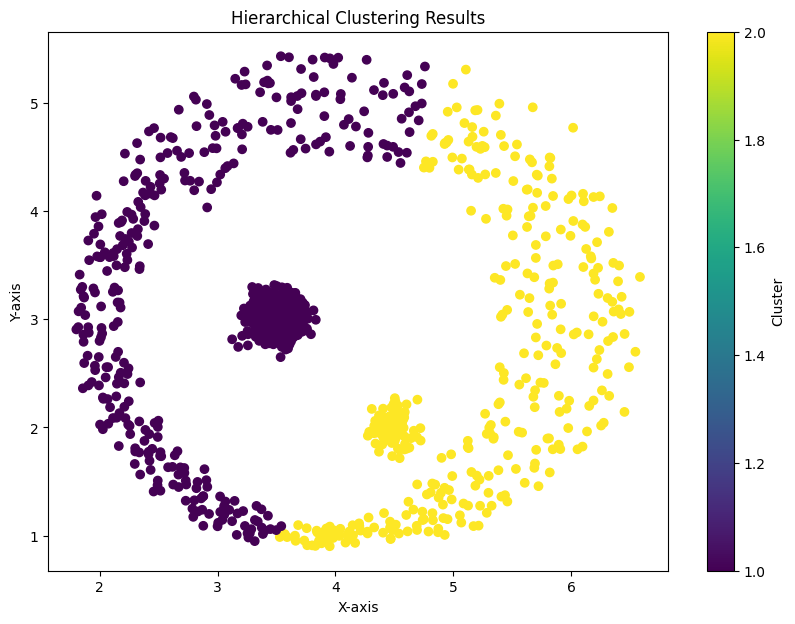

In [ ]:
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt

# Determine the clusters. You can choose a distance threshold or number of clusters.
# Let's choose a number of clusters, for example, 2, based on the dendrogram.
# You might need to adjust the 't' value (either distance or max_d) based on your dendrogram.
# For 'maxclust', 't' is the number of clusters.
max_d = 2 # Assuming 2 clusters based on the previous dendrogram
clusters = fcluster(linked_circles, max_d, criterion='maxclust')

# Visualize the clustered data
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], Y[:, 0], c=clusters, cmap='viridis') # Assuming X and Y are the original data
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Hierarchical Clustering Results')
plt.colorbar(label='Cluster')
plt.show()

# Specials


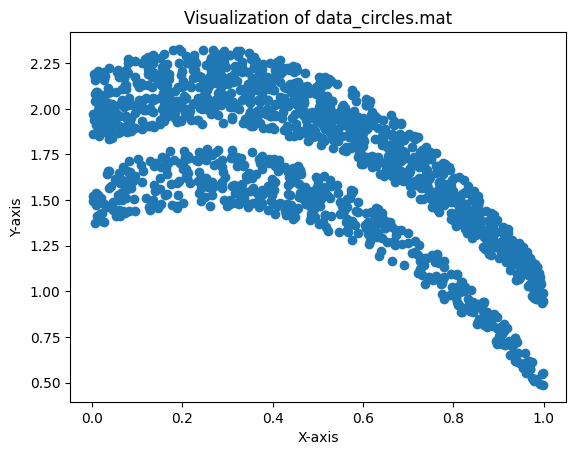

In [ ]:

from scipy.io import loadmat
import matplotlib.pyplot as plt

# Load the .mat file
mat_data_s = loadmat('/content/drive/MyDrive/Colab Notebooks/Files/data_special.mat')

# Extract the data (assuming the data is stored in a variable named 'X' and 'Y' in the .mat file)
Xs = mat_data_s['X']
Ys = mat_data_s['Y']

# Create a scatter plot
plt.scatter(Xs[:, 0], Ys[:, 0])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Visualization of data_circles.mat')
plt.show()


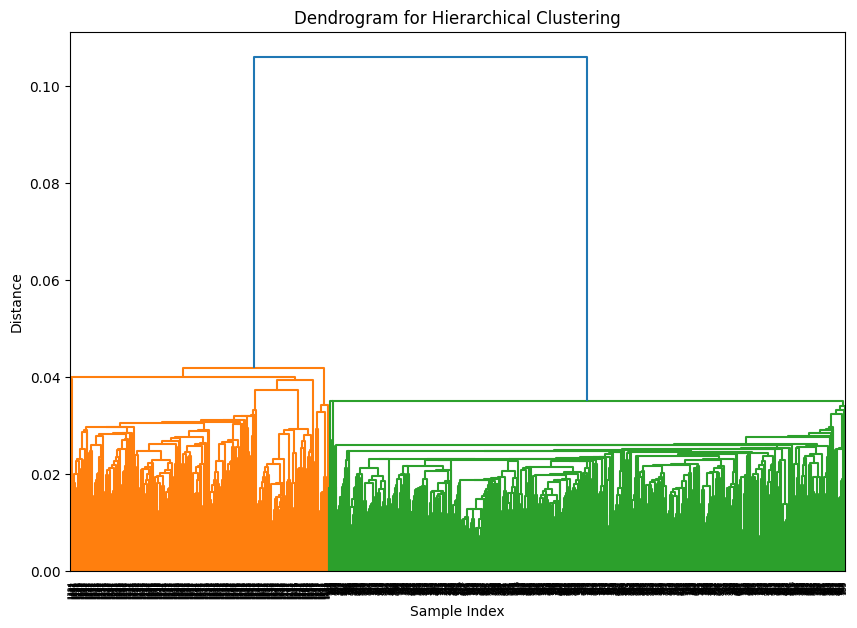

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

# Perform hierarchical clustering
# We use 'ward' linkage which minimizes the variance of the clusters being merged.
# Since X and Y are separate arrays, we need to combine them for clustering.
# Assuming X and Y correspond to the two dimensions of the data points.
#data = mat_data_s['X'] # Assuming X contains the data points
# If your data has more than one dimension stored in separate arrays, you would combine them like this:
data = np.hstack((mat_data_s['X'], mat_data_s['Y']))

linked = linkage(data, 'single')

# Generate the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

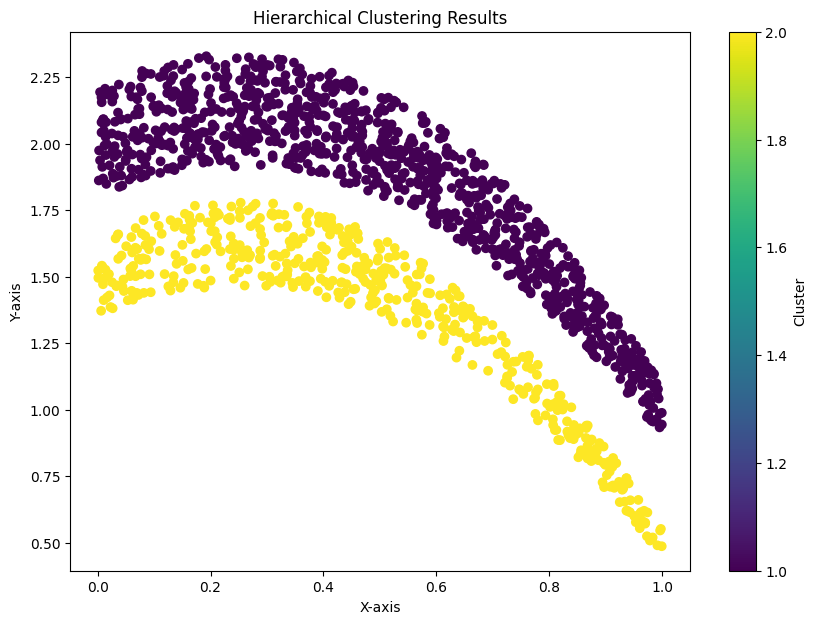

In [ ]:
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt

# Determine the clusters. You can choose a distance threshold or number of clusters.
# Let's choose a number of clusters, for example, 2, based on the dendrogram.
# You might need to adjust the 't' value (either distance or max_d) based on your dendrogram.
# For 'maxclust', 't' is the number of clusters.
max_d = 2 # Assuming 2 clusters based on the previous dendrogram
clusters = fcluster(linked, max_d, criterion='maxclust')

# Visualize the clustered data
plt.figure(figsize=(10, 7))
plt.scatter(Xs[:, 0], Ys[:, 0], c=clusters, cmap='viridis') # Assuming X and Y are the original data
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Hierarchical Clustering Results')
plt.colorbar(label='Cluster')
plt.show()